In [2]:
import pandas as pd

#dataCSV = pd.read_csv("/home/gabija/Downloads/for_gabija.csv")   

#dataCSV = pd.read_csv("/home/gabija/Downloads/glialcell.csv")   

dataCSV = pd.read_csv("greta/feature/macrophage.csv")   


data = pd.DataFrame(dataCSV)

import xgboost as xgb
from sklearn.metrics import mean_squared_error
import sklearn
import sklearn.ensemble
import pandas as pd
import numpy as np

X, y = data.iloc[:,2:],data.iloc[:,1] #check if correct with new data

data_dmatrix = xgb.DMatrix(data=X,label=y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

ModuleNotFoundError: No module named 'xgboost'

In [54]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from torch import nn, optim
from torch.utils.data import DataLoader
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

class Regressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(9, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)

        self.dropout = nn.Dropout(p=0.1)

    def forward(self, x):

        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        #x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        #x = F.relu(self.fc3(x))
        x = self.fc4(x)

        return x

In [55]:
train_batch = np.array_split(X_train, 50)
label_batch = np.array_split(y_train, 50)

In [56]:
train_batch[0].shape

(115, 9)

In [57]:
for i in range(len(train_batch)):
    train_batch[i] = torch.from_numpy(train_batch[i].values).float()
for i in range(len(label_batch)):
    label_batch[i] = torch.from_numpy(label_batch[i].values).float().view(-1, 1)

X_val = torch.from_numpy(X_test.values).float()
y_val = torch.from_numpy(y_test.values).float().view(-1, 1)

In [58]:
model = Regressor()
ps = model(train_batch[0])
ps.shape

torch.Size([115, 1])

In [59]:
model = Regressor()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

epochs = 40

train_losses, test_losses = [], []
for e in range(epochs):
    model.train()
    train_loss = 0
    for i in range(len(train_batch)):
        optimizer.zero_grad()
        output = model(train_batch[i])
        #print(output)
        loss = criterion(output, label_batch[i]) #this is modified with log removed
        #print(loss)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        with torch.no_grad():
            model.eval()
            predictions = model(X_val)
            test_loss += torch.sqrt(criterion(predictions, y_val))
                
        train_losses.append(train_loss/len(train_batch))
        test_losses.append(test_loss)

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_loss/len(train_batch)),
              "Test Loss: {:.3f}.. ".format(test_loss))

Epoch: 1/40..  Training Loss: 1.028..  Test Loss: 1.012.. 
Epoch: 2/40..  Training Loss: 0.998..  Test Loss: 0.996.. 
Epoch: 3/40..  Training Loss: 0.967..  Test Loss: 0.979.. 
Epoch: 4/40..  Training Loss: 0.931..  Test Loss: 0.958.. 
Epoch: 5/40..  Training Loss: 0.889..  Test Loss: 0.932.. 
Epoch: 6/40..  Training Loss: 0.843..  Test Loss: 0.904.. 
Epoch: 7/40..  Training Loss: 0.799..  Test Loss: 0.880.. 
Epoch: 8/40..  Training Loss: 0.765..  Test Loss: 0.861.. 
Epoch: 9/40..  Training Loss: 0.742..  Test Loss: 0.849.. 
Epoch: 10/40..  Training Loss: 0.723..  Test Loss: 0.841.. 
Epoch: 11/40..  Training Loss: 0.716..  Test Loss: 0.836.. 
Epoch: 12/40..  Training Loss: 0.712..  Test Loss: 0.833.. 
Epoch: 13/40..  Training Loss: 0.705..  Test Loss: 0.831.. 
Epoch: 14/40..  Training Loss: 0.703..  Test Loss: 0.830.. 
Epoch: 15/40..  Training Loss: 0.700..  Test Loss: 0.829.. 
Epoch: 16/40..  Training Loss: 0.698..  Test Loss: 0.828.. 
Epoch: 17/40..  Training Loss: 0.695..  Test Loss

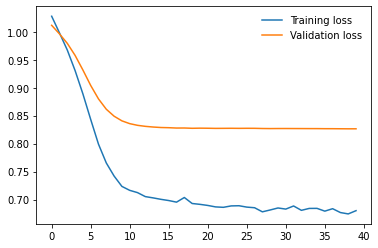

In [60]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)


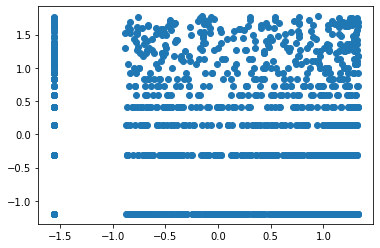

In [61]:
plt.scatter(X_test.iloc[:,0], y_test)

In [62]:
with torch.no_grad():
    model.eval()
    output = model.forward(X_val)

output.shape

torch.Size([1433, 1])

In [63]:
hellKnows = output.numpy()
hellKnows

array([[ 0.77287096],
       [-0.70106626],
       [ 0.04336828],
       ...,
       [-0.4880913 ],
       [-0.00105044],
       [ 0.6438254 ]], dtype=float32)

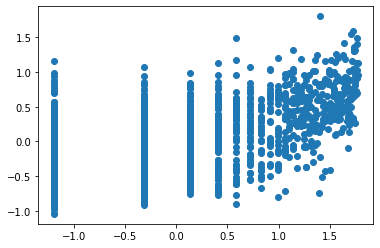

In [64]:
plt.scatter(y_val, hellKnows)

In [65]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, hellKnows)

0.6830895

In [15]:

#xgboost regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 8, alpha = 10, n_estimators = 100)

In [16]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("XGBOOST RMSE: %f" % (rmse))

XGBOOST RMSE: 0.808532


In [17]:
model = sklearn.ensemble.RandomForestRegressor(n_estimators=1000)
model.fit(X_train, y_train)
preds = model.predict(X_test)
print("FOREST RMSE", np.sqrt(mean_squared_error(y_test, preds)))

FOREST RMSE 0.8072635179717422


In [18]:
import gpytorch
import torch

#torch.set_default_dtype(torch.float32) #64 for GPs of higher polynomials

/home/gabija/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/gabija/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/gabija/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/gabija/.local/lib/python3.7/site-packages/pa

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb2c5274d0>,
      dtype=object)

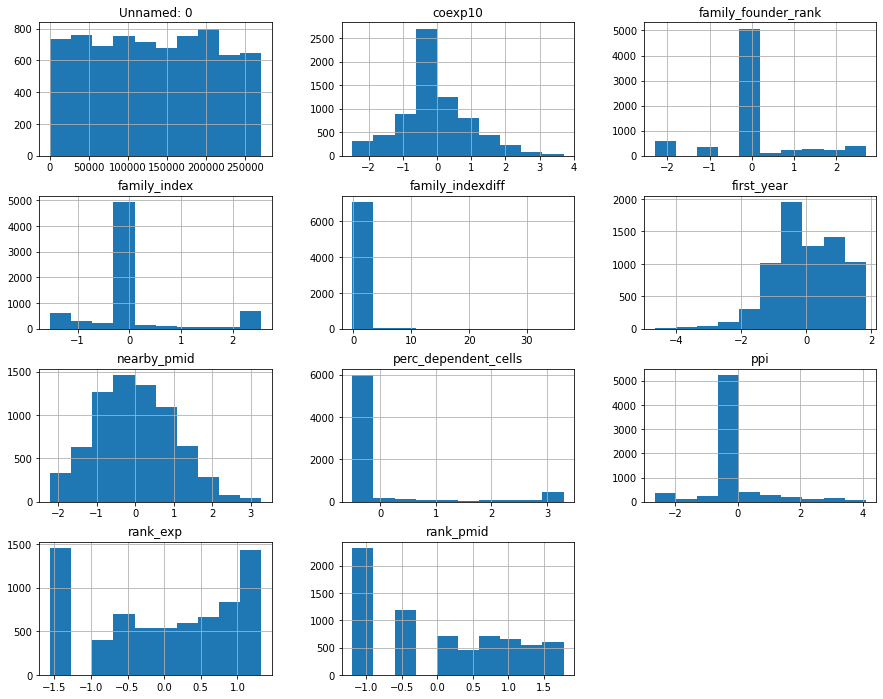

In [19]:
data.hist(figsize=(15, 12))

In [20]:
class GPR(gpytorch.models.exact_gp.ExactGP):
    def __init__(self, X, y):
        likelihood = gpytorch.likelihoods.GaussianLikelihood()
        super().__init__(X, y, likelihood)
        self.mean_module = gpytorch.means.ZeroMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(
            gpytorch.kernels.MaternKernel(nu=5/2, ard_num_dims=X.size(1)))
        print(X.size(1))
        
    def forward(self, X):
        return gpytorch.distributions.MultivariateNormal(
            self.mean_module(X), self.covar_module(X))            

In [21]:
model = GPR(torch.from_numpy(X_train.values), torch.from_numpy(y_train.values)) #.cuda
mll = gpytorch.mlls.ExactMarginalLogLikelihood(model.likelihood, model)

9


In [22]:
model = model.cpu()
mll = gpytorch.mlls.ExactMarginalLogLikelihood(model.likelihood, model)

In [23]:
model.train_targets

tensor([-1.1965,  1.2957,  0.9177,  ...,  1.1388, -1.1965, -1.1965],
       dtype=torch.float64)

In [27]:
optimizer = torch.optim.Adam(lr=0.01, params=model.parameters())

def closure():
    optimizer.zero_grad()
    loss = -mll(model(model.train_inputs[0]), model.train_targets)
    loss.backward()
    print(f"Likelihood: {-loss.item()}")
    return loss
for _ in range(100):
    optimizer.step(closure)

RuntimeError: expected dtype Double but got dtype Float

In [ ]:
model.eval()

In [ ]:
preds = model(torch.from_numpy(X_test.values)).mean.detach()

In [ ]:
#preds = np.zeros_like(y_test) + y_train.mean()

In [ ]:
print("RMSE", np.sqrt(mean_squared_error(y_test, preds)))

In [ ]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [ ]:
cv_results.head()
y.head()

In [ ]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from torch import nn, optim
from torch.utils.data import DataLoader
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline



xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [ ]:
A = np.array(list(set(y_train.values)))
np.sort(A)

In [ ]:
#A = np.sort(A)
#plt.plot(A)

In [ ]:
X.values.shape, y.values.shape

In [ ]:
#!pip3 install GPflow

In [ ]:
import gpflow

model = gpflow.models.GPR(data=(X.values.copy(), y.values.copy()[:, None]), kernel=gpflow.kernels.Matern32())